# Phase Estimation
##  This notebook contains some circuits for the Quantum Fourier Transform in Phase Estimation circuits. This is no longer used in the report, so it it is not required as part of the assignment. It mainly serves to show the followig:
## 1) That the QFT is used as a component of other algorithms
## 2) In this context it also suffers from the issues of the quantum environment which increase as more qubits are added.

# <font color=red> **Important Information for running on the IBM machines** </font>
### In order to keep personal / secure information separate from the Python program, rather than hard-code the quantum server key directly into the Python code, it is stored in the local file called *ibm_token.txt* supplied with this notebook. This file should be placed in the same directory as the notebook, and the code will run against the quantum server.
### <font color=red> **My IBM key is in the file supplied with this notebook - make sure that this is in place before running** </font>

In [1]:
# -*- coding: utf-8 -*-

# This code is part of Qiskit.
#
# (C) Copyright IBM 2017.
#
# This code is licensed under the Apache License, Version 2.0. You may
# obtain a copy of this license in the LICENSE.txt file in the root directory
# of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

"""
Quantum Fourier Transform examples.
"""

import math
from qiskit import QuantumCircuit
from qiskit import execute, BasicAer

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
###############################################################
# make the qft
###############################################################
def input_state(circ, n):
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(j)
        circ.u1(-math.pi/float(2**(j)), j)

def qft(circ, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        for k in range(j):
            circ.cu1(math.pi/float(2**(j-k)), j, k)
        circ.h(j)


In [3]:
#qft3 = QuantumCircuit(5, 5, name="qft3")
#qft4 = QuantumCircuit(5, 5, name="qft4")
#qft5 = QuantumCircuit(5, 5, name="qft5")

qft3 = QuantumCircuit(3, 3, name="qft3")
qft4 = QuantumCircuit(4, 4, name="qft4")
qft5 = QuantumCircuit(5, 5, name="qft5")
qft8 = QuantumCircuit(8, 8, name="qft8")

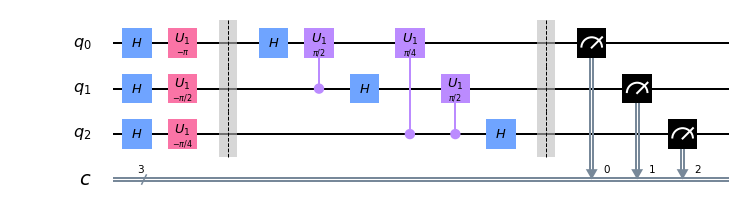

In [4]:
input_state(qft3, 3)
qft3.barrier()
qft(qft3, 3)
qft3.barrier()
for j in range(3):
    qft3.measure(j, j)

%config InlineBackend.figure_format = 'png' # stops the images getting too big
qft3.draw(output="mpl")

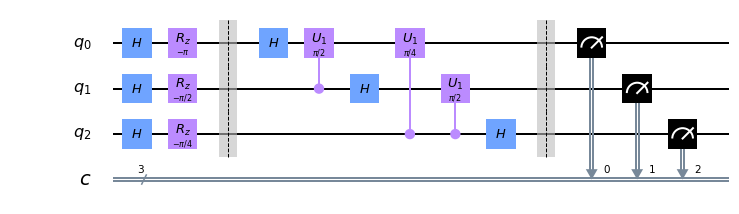

In [5]:
def koch_input_state(circ, n):
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(j)
        circ.rz(-math.pi/float(2**(j)), j)


qft3_koch = QuantumCircuit(3, 3, name="qft3_koch")

koch_input_state(qft3_koch, 3)
qft3_koch.barrier()
qft(qft3_koch, 3)      
qft3_koch.barrier()
for j in range(3):
    qft3_koch.measure(j, j)

%config InlineBackend.figure_format = 'png' # stops the images getting too big
qft3_koch.draw(output="mpl")

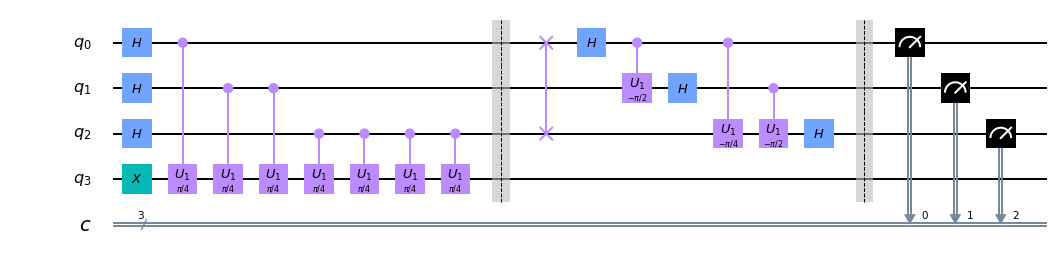

In [6]:
#3 qubits with phase estimation
# See https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html

# Inverse QFT - QFT dagger
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)


qpe = QuantumCircuit(4, 3)
qpe.x(3)               #X Gate on qubite 03 - q03=eigenstate of unitary operator

for qubit in range(3):
    qpe.h(qubit)
    

repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cu1(math.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2

#for counting_qubit in range(3):
#    for i in range(repetitions):
#        qpe.cu1(angle, counting_qubit, 3);
#    repetitions *= 2


qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)


%config InlineBackend.figure_format = 'png' # stops the images getting too big
qpe.draw(output="mpl")



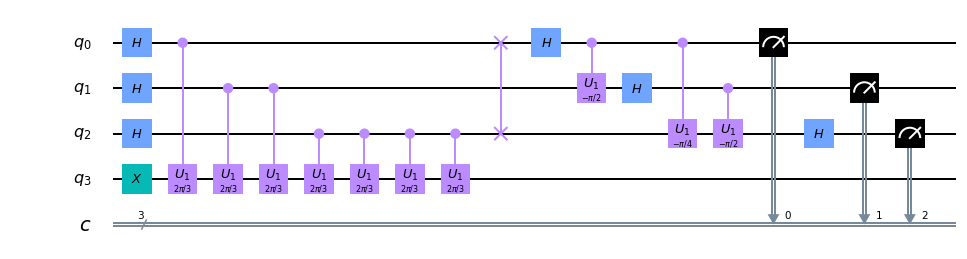

In [7]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cu1(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

%config InlineBackend.figure_format = 'png' # stops the images getting too big
qpe2.draw(output='mpl')


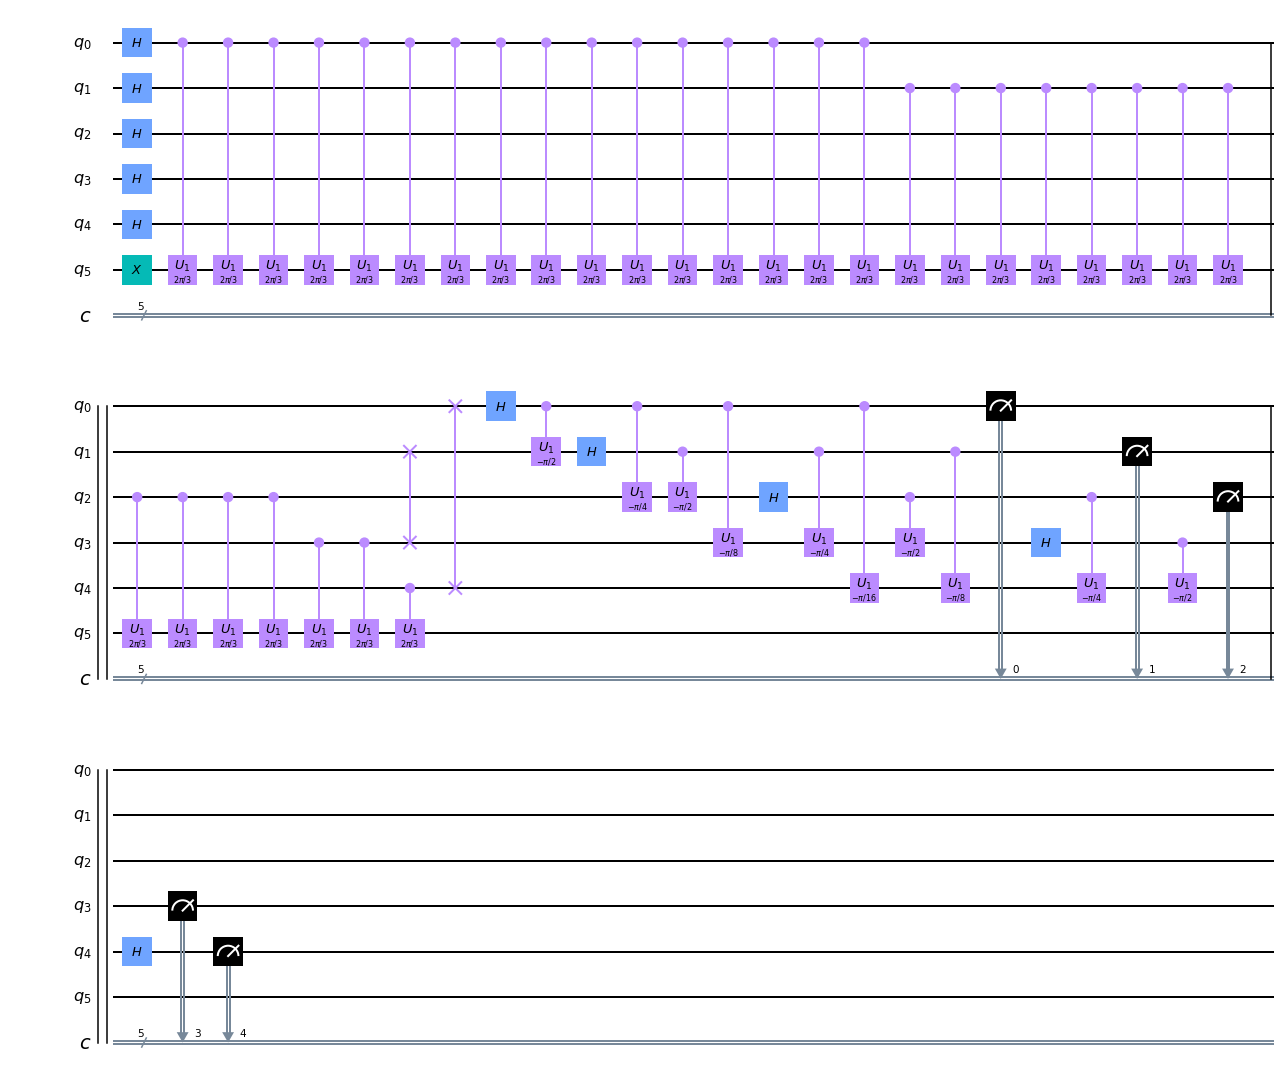

In [8]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 2**4
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cu1(angle, counting_qubit, 5);
    repetitions //= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
for n in range(5):
    qpe3.measure(n,n)

%config InlineBackend.figure_format = 'png'
qpe3.draw(output='mpl')


In [9]:
input_state(qft4, 4)
qft4.barrier()
qft(qft4, 4)
qft4.barrier()
for j in range(4):
    qft4.measure(j, j)

In [10]:
input_state(qft5, 5)
qft5.barrier()
qft(qft5, 5)
qft5.barrier()
for j in range(5):
    qft5.measure(j, j)

In [11]:
input_state(qft8, 8)
qft8.barrier()
qft(qft8, 8)
qft8.barrier()
for j in range(8):
    qft8.measure(j, j)

In [195]:
print(qft3)

        ┌───┐ ┌─────────┐  ░ ┌───┐                                ░ ┌─┐      
q_0: |0>┤ H ├─┤ U1(-pi) ├──░─┤ H ├─■───────────■──────────────────░─┤M├──────
        ├───┤┌┴─────────┴┐ ░ └───┘ │pi/2 ┌───┐ │                  ░ └╥┘┌─┐   
q_1: |0>┤ H ├┤ U1(-pi/2) ├─░───────■─────┤ H ├─┼──────■───────────░──╫─┤M├───
        ├───┤├───────────┤ ░             └───┘ │pi/4  │pi/2 ┌───┐ ░  ║ └╥┘┌─┐
q_2: |0>┤ H ├┤ U1(-pi/4) ├─░───────────────────■──────■─────┤ H ├─░──╫──╫─┤M├
        └───┘└───────────┘ ░                                └───┘ ░  ║  ║ └╥┘
 c_0: 0 ═════════════════════════════════════════════════════════════╩══╬══╬═
                                                                        ║  ║ 
 c_1: 0 ════════════════════════════════════════════════════════════════╩══╬═
                                                                           ║ 
 c_2: 0 ═══════════════════════════════════════════════════════════════════╩═
                                                                

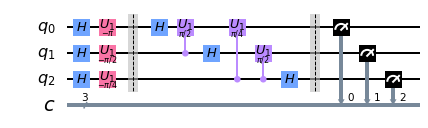

In [12]:
qft3.draw(output="mpl",scale=0.4)

In [13]:
print(qft4)

        ┌───┐ ┌─────────┐  ░ ┌───┐                                             »
q_0: |0>┤ H ├─┤ U1(-pi) ├──░─┤ H ├─■───────────■─────────────■─────────────────»
        ├───┤┌┴─────────┴┐ ░ └───┘ │pi/2 ┌───┐ │             │                 »
q_1: |0>┤ H ├┤ U1(-pi/2) ├─░───────■─────┤ H ├─┼──────■──────┼───────────■─────»
        ├───┤├───────────┤ ░             └───┘ │pi/4  │pi/2  │     ┌───┐ │     »
q_2: |0>┤ H ├┤ U1(-pi/4) ├─░───────────────────■──────■──────┼─────┤ H ├─┼─────»
        ├───┤├───────────┤ ░                                 │pi/8 └───┘ │pi/4 »
q_3: |0>┤ H ├┤ U1(-pi/8) ├─░─────────────────────────────────■───────────■─────»
        └───┘└───────────┘ ░                                                   »
 c_0: 0 ═══════════════════════════════════════════════════════════════════════»
                                                                               »
 c_1: 0 ═══════════════════════════════════════════════════════════════════════»
                            

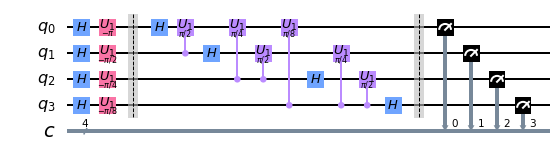

In [14]:
qft4.draw(output="mpl",scale=0.4)

In [15]:
print(qft5)

        ┌───┐ ┌─────────┐   ░ ┌───┐                                      »
q_0: |0>┤ H ├─┤ U1(-pi) ├───░─┤ H ├─■───────────■─────────────■──────────»
        ├───┤┌┴─────────┴┐  ░ └───┘ │pi/2 ┌───┐ │             │          »
q_1: |0>┤ H ├┤ U1(-pi/2) ├──░───────■─────┤ H ├─┼──────■──────┼──────────»
        ├───┤├───────────┤  ░             └───┘ │pi/4  │pi/2  │     ┌───┐»
q_2: |0>┤ H ├┤ U1(-pi/4) ├──░───────────────────■──────■──────┼─────┤ H ├»
        ├───┤├───────────┤  ░                                 │pi/8 └───┘»
q_3: |0>┤ H ├┤ U1(-pi/8) ├──░─────────────────────────────────■──────────»
        ├───┤├───────────┴┐ ░                                            »
q_4: |0>┤ H ├┤ U1(-pi/16) ├─░────────────────────────────────────────────»
        └───┘└────────────┘ ░                                            »
 c_0: 0 ═════════════════════════════════════════════════════════════════»
                                                                         »
 c_1: 0 ═════════════════

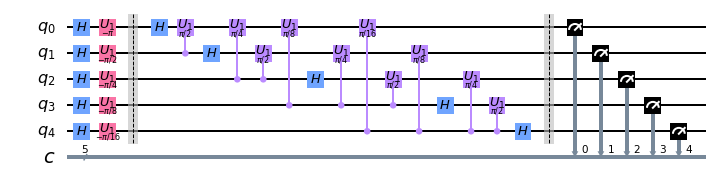

In [16]:
qft5.draw(output="mpl",scale=0.4)

In [17]:
print(qft8)

        ┌───┐  ┌─────────┐   ░ ┌───┐                                      »
q_0: |0>┤ H ├──┤ U1(-pi) ├───░─┤ H ├─■───────────■─────────────■──────────»
        ├───┤ ┌┴─────────┴┐  ░ └───┘ │pi/2 ┌───┐ │             │          »
q_1: |0>┤ H ├─┤ U1(-pi/2) ├──░───────■─────┤ H ├─┼──────■──────┼──────────»
        ├───┤ ├───────────┤  ░             └───┘ │pi/4  │pi/2  │     ┌───┐»
q_2: |0>┤ H ├─┤ U1(-pi/4) ├──░───────────────────■──────■──────┼─────┤ H ├»
        ├───┤ ├───────────┤  ░                                 │pi/8 └───┘»
q_3: |0>┤ H ├─┤ U1(-pi/8) ├──░─────────────────────────────────■──────────»
        ├───┤ ├───────────┴┐ ░                                            »
q_4: |0>┤ H ├─┤ U1(-pi/16) ├─░────────────────────────────────────────────»
        ├───┤ ├────────────┤ ░                                            »
q_5: |0>┤ H ├─┤ U1(-pi/32) ├─░────────────────────────────────────────────»
        ├───┤ ├────────────┤ ░                                            »
q_6: |0>┤ H 

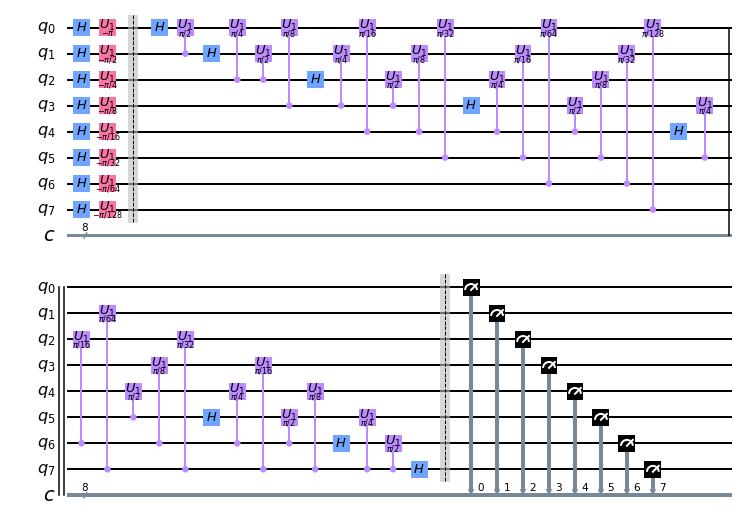

In [18]:
%config InlineBackend.figure_format = 'png' # stops the images getting too big
qft8.draw(output="mpl",scale=0.4)

In [19]:
print('Qasm simulator')
sim_backend = BasicAer.get_backend('qasm_simulator')
#job = execute([qft3, qft4, qft5], sim_backend, shots=1024)
#result = job.result()

Qasm simulator


In [20]:
job = execute([qft3, qft3_koch, qpe, qpe2,qpe3, qft4, qft5], sim_backend, shots=1024)
#job = execute([qpe], sim_backend, shots=1024)    # Single Circuit
result = job.result()
#print(result3.time_taken)
#print(result3)
##counts_qpe = job.result().get_counts(qpe)
##print(result.get_counts(qpe))
##plot_histogram(counts_qpe)


{'001': 1024}


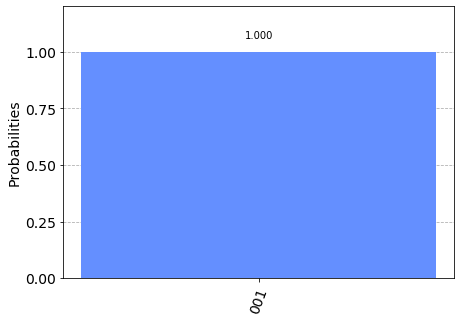

In [21]:
result3 = job.result()
#print(result3.time_taken)
#print(result3)
counts3 = job.result().get_counts(qft3)
print(result.get_counts(qft3))
plot_histogram(counts3)

{'001': 1024}


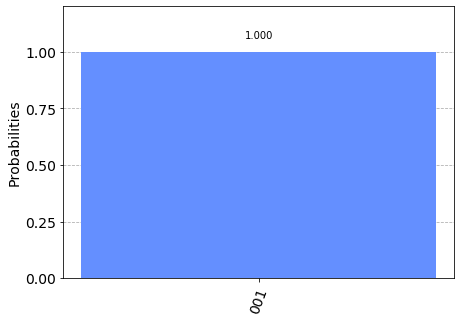

In [22]:
counts_qft3_koch = job.result().get_counts(qft3_koch)
print(result.get_counts(qft3_koch))
plot_histogram(counts_qft3_koch)

{'001': 1024}


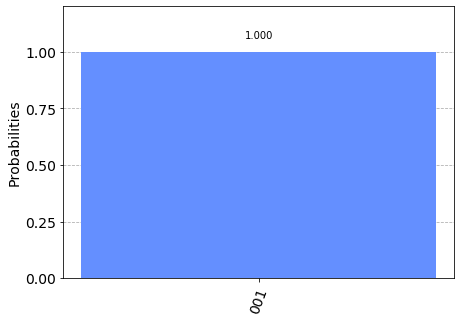

In [23]:
counts_qpe = job.result().get_counts(qpe)
print(result.get_counts(qpe))
plot_histogram(counts_qpe)

{'011': 701, '100': 52, '110': 15, '010': 166, '111': 14, '001': 41, '101': 13, '000': 22}


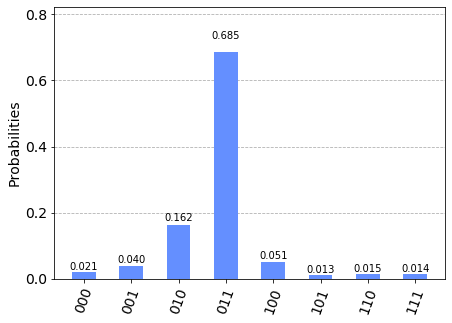

In [24]:
counts_qpe2 = job.result().get_counts(qpe2)
print(result.get_counts(qpe2))
plot_histogram(counts_qpe2)

{'10011': 1, '10000': 3, '01000': 14, '01010': 163, '00100': 6, '00011': 1, '01101': 10, '01100': 52, '00111': 4, '01011': 708, '01110': 7, '10001': 1, '11110': 1, '11111': 1, '10111': 1, '01111': 3, '11011': 2, '11001': 1, '11010': 1, '11101': 1, '01001': 23, '10100': 2, '00110': 6, '11000': 4, '00010': 5, '00001': 2, '00000': 1}


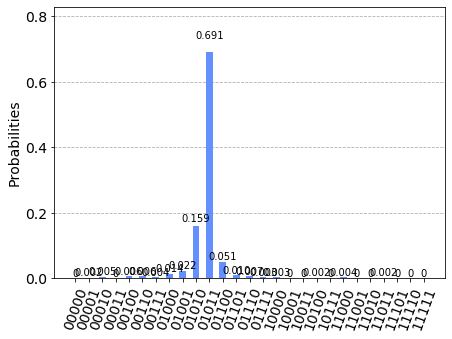

In [25]:
counts_qpe3 = job.result().get_counts(qpe3)
print(result.get_counts(qpe3))
plot_histogram(counts_qpe3)

{'0001': 1024}


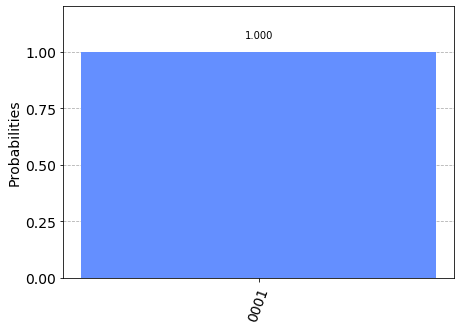

In [26]:
counts4 = job.result().get_counts(qft4)
print(result.get_counts(qft4))
plot_histogram(counts4)

{'00001': 1024}


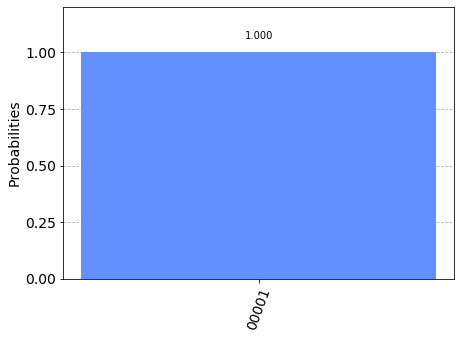

In [27]:
counts5 = job.result().get_counts(qft5)
print(result.get_counts(qft5))
plot_histogram(counts5)

In [28]:
counts8 = job.result().get_counts(qft8)
#print(result.get_counts(qft8))
plot_histogram(counts8)

QiskitError: 'Data for experiment "qft8" could not be found.'

In [152]:
# Run on quantum machine

from qiskit import IBMQ

  # Get login token for machines
f = open('ibm_token.txt')

ibm_key = f.readline()
f.close()
IBMQ.save_account(ibm_key )

IBMQ.load_account()
IBMQ.providers()

provider = IBMQ.get_provider("ibm-q")


Credentials already present. Set overwrite=True to overwrite.
Credentials are already in use. The existing account in the session will be replaced.


In [212]:
# Documentation code showing the available servers and state

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 0 queued and 5 qubits
ibmq_16_melbourne has 13 queued and 15 qubits
ibmq_vigo has 2 queued and 5 qubits
ibmq_ourense has 1 queued and 5 qubits
ibmq_london has 2 queued and 5 qubits
ibmq_burlington has 0 queued and 5 qubits
ibmq_essex has 3 queued and 5 qubits
ibmq_armonk has 58 queued and 1 qubits


In [213]:
selected_ibm_server = "ibmq_16_melbourne"
shots =8192
#backend = provider.get_backend("ibmq_london")
backend = provider.get_backend(selected_ibm_server)

optimization = 3

from qiskit.tools.monitor import job_monitor
##timeBefore_aer = time.clock()

job = execute([qft3, qft3_koch, qpe, qpe2, qpe3, qft4, qft5,],  backend=backend, shots=8192, max_credits=10,optimization_level=optimization)
##timeAfter_aer = time.clock()

job_monitor(job, interval = 2)

results = job.result()

#answer = results.get_counts(qc)
#plot_histogram(answer)


Job Status: job has successfully run


{'001': 1024}


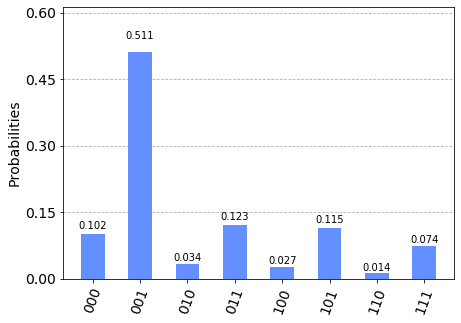

In [214]:
results = job.result(qft3)
#print(results)
answer3 = job.result(qft3).get_counts(qft3)
print(result.get_counts(qft3))
plot_histogram(answer3)

{'001': 1024}


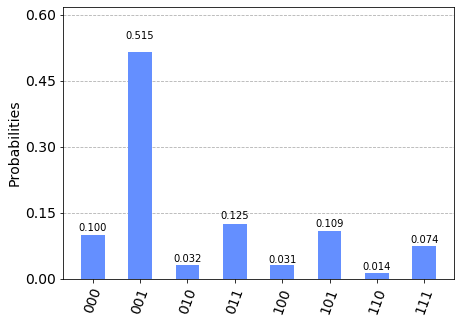

In [215]:
answer_qft3_koch = job.result().get_counts(qft3_koch)
print(result.get_counts(qft3_koch))
plot_histogram(answer_qft3_koch)

{'001': 1024}


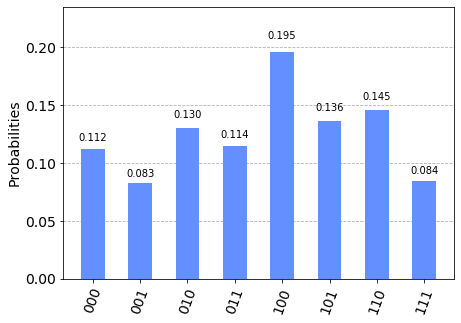

In [216]:
answer_qpe = job.result().get_counts(qpe)
print(result.get_counts(qpe))
plot_histogram(answer_qpe)


{'000': 21, '010': 162, '011': 734, '101': 18, '100': 40, '001': 26, '110': 10, '111': 13}


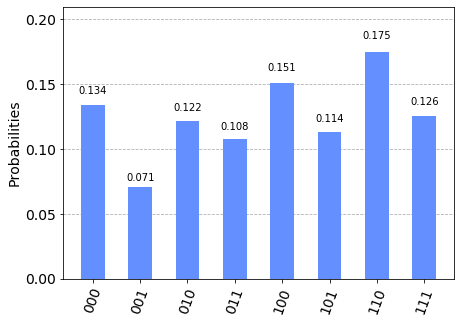

In [217]:
answer_qpe2 = job.result().get_counts(qpe2)
print(result.get_counts(qpe2))
plot_histogram(answer_qpe2)

{'10000': 2, '01111': 2, '10001': 1, '00010': 1, '01110': 6, '10111': 1, '11011': 1, '00011': 3, '10100': 3, '01101': 15, '01100': 48, '11010': 1, '01010': 179, '10110': 1, '01000': 11, '11111': 1, '01011': 698, '01001': 25, '00101': 5, '00110': 7, '10010': 1, '00111': 12}


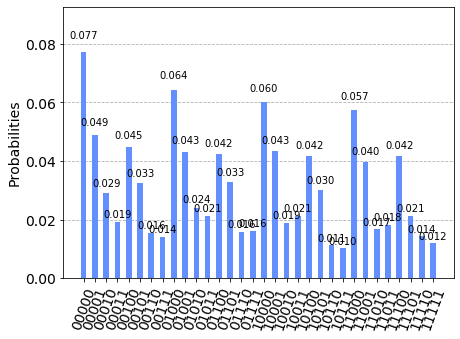

In [218]:
answer_qpe3 = job.result().get_counts(qpe3)
print(result.get_counts(qpe3))
plot_histogram(answer_qpe3)

{'0001': 1024}


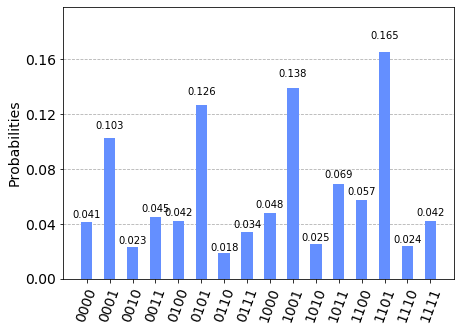

In [219]:
answer4 = job.result().get_counts(qft4)
print(result.get_counts(qft4))
plot_histogram(answer4)


{'00001': 1024}


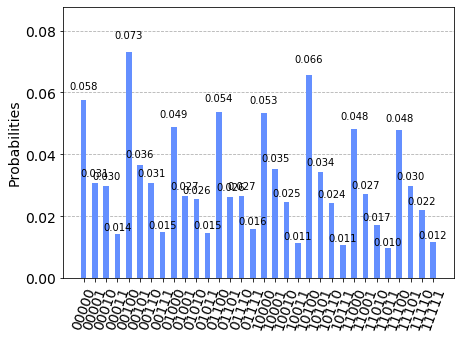

In [220]:
results = job.result(qft5)
#print(results)
answer5 = job.result(qft5).get_counts(qft5)
print(result.get_counts(qft5))
plot_histogram(answer5)


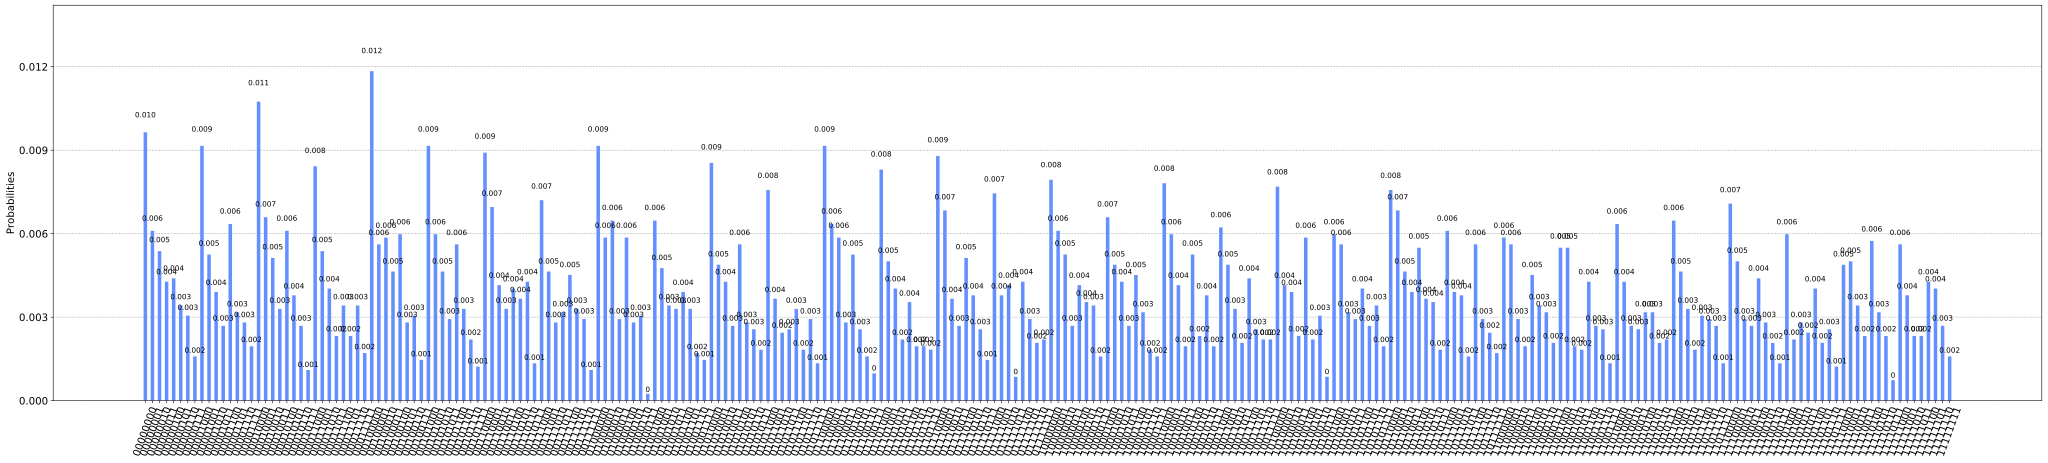

In [128]:
results = job.result(qft8)
#print(results)
answer8 = job.result(qft8).get_counts(qft8)
#print(result.get_counts(qft8))
plot_histogram(answer8, figsize=(49, 10))